In [9]:
%matplotlib inline

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [75]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

In [76]:
from utils import conditional_probabilities, entropy

In [77]:
data, colors = datasets.make_blobs(n_samples=500, n_features = 2, centers=2, cluster_std=[2., 0.5], random_state=21)

In [107]:
def plot_gaussian(ax, xpos, ypos, sigma, levels=None):
    size = 100
    xl = ax.get_xlim()
    yl = ax.get_xlim()
    x = np.linspace(xl[0], xl[1], 100)
    y = np.linspace(yl[0], yl[1], 100)

    xx, yy = np.meshgrid(x, y)
    z = (1/(2*np.pi*sigma**2) * np.exp(-((xx - xpos)**2/(2*sigma**2)
         + (yy - ypos)**2/(2*sigma**2))))

    if levels is None:
        levels = 5
    ax.contour(xx, yy, z, cmap='RdGy', levels=levels, linewidths=np.ones_like(levels) * 5.)

(-15.779805932917824,
 6.8847027567871315,
 -11.640657647571382,
 11.023851042133574)

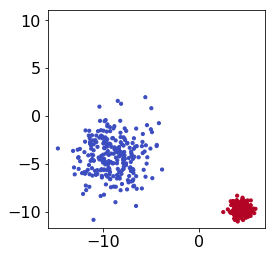

In [108]:
plt.scatter(data[:, 0], data[:, 1], c=colors, s=10, cmap='coolwarm')
plt.axis('square')

In [109]:
cluster_2_indices = np.where(colors == 1)[0]
IDX_2 = np.random.choice(cluster_2_indices)

# Try different sigmas for point 1

In [110]:
cluster_1_idx = 355

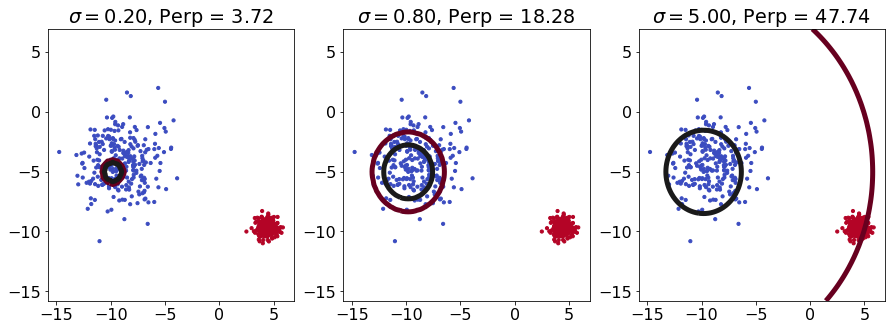

In [111]:
fig = plt.figure(figsize=(15, 5))
sigmas = [.2, .8, 5.]

for sigma_idx, sigma in enumerate(sigmas):
    ax = fig.add_subplot(1, 3, sigma_idx + 1)
    ax.scatter(data[:, 0], data[:, 1], c=colors, s=10, cmap='coolwarm')
    plot_gaussian(ax, data[cluster_1_idx, 0], data[cluster_1_idx, 1], sigma, levels=[0.00005, 0.005])
    
    p_ji = conditional_probabilities(data, cluster_1_idx, sigma)
    perp = 2 ** entropy(p_ji)
    ax.set_title(r'$\sigma =  %.2f$, Perp = %.2f' % (sigma, perp))
    

In [85]:
cluster_2_idx = 351

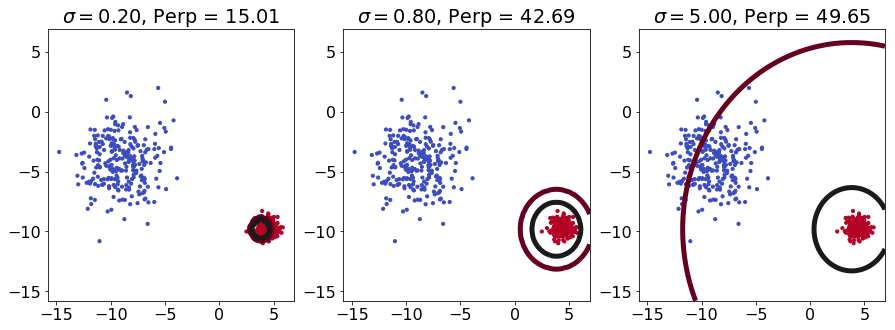

In [113]:
fig = plt.figure(figsize=(15, 5))
sigmas = [.2, .8, 5.]

for sigma_idx, sigma in enumerate(sigmas):
    ax = fig.add_subplot(1, 3, sigma_idx + 1)
    ax.scatter(data[:, 0], data[:, 1], c=colors, s=10, cmap='coolwarm')
    plot_gaussian(ax, data[cluster_2_idx, 0], data[cluster_2_idx, 1], sigma, levels=[0.00005, 0.005])
    
    p_ji = conditional_probabilities(data, cluster_2_idx, sigma)
    perp = 2 ** entropy(p_ji)
    ax.set_title(r'$\sigma =  %.2f$, Perp = %.2f' % (sigma, perp))
    